## Capstone 3: Sustainable Energy Recommendation System  
### "Leveraging Neural Collaborative Filtering for Sustainable Energy Insights"
## Preprocessing   and   Training   Data   Development Objective: 
Goal: Create a cleaned development dataset you can use to complete the modeling step of your project.  
Steps:   
    ● Create   dummy   or   indicator   features   for   categorical   variables  
    ● Standardize   the   magnitude   of   numeric   features   using   a   scaler  
    ● Split   into   testing   and   training   datasets 

### Neural Collaborative Filtering (NCF):

NCF is an advanced deep-learning approach for recommendation systems. Unlike traditional methods like matrix factorization, NCF learns complex relationships using neural networks.

    - Learns user-item interactions dynamically rather than assuming a linear relationship
    - Uses embeddings to encode user/item features and predict preferences
    - Scales better for large datasets compared to traditional collaborative filtering

Requires an user-tem interactions structure...

This data will protray: 
- Users -> **Countries**
- Items -> Energy investments, policy impacts, or **renewable adoption rates**
- Interactions -> Energy consumption, investment ratios or **adoption success** 



In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

In [80]:
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Energy/data')
file_path = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Energy/data/energy_data_eda.csv'
df = pd.read_csv(file_path)

In [52]:
df.head()

,Entity,Year,Electricity_Access,Clean_Cooking_Fuels,Renewable_Capacity,Financial_Flows,Renewable_Share,Fossil_Electricity,Nuclear_Electricity,Renewable_Electricity,...,Energy_Dependency,CO2_Intensity_Per_Capita,Renewables_to_Fossil,Energy_Efficiency,Renewable_Nuclear_Interaction,Energy_Cluster,Renewable_Adoption_Group,Investment_Energy_Ratio,Policy_Impact,Econ_Energy_Cluster
0,0,2000,1.613591,6.2,9.22,20000.0,0.468451,0.16,0.0,0.31,...,9.369013e+03,0.000005,1.937488,2.300408,0.0,2,Low Renewable Adoption,1.734055e+07,Strong Investment,0
1,0,2001,4.074574,7.2,8.86,130000.0,0.474802,0.09,0.0,0.50,...,6.172428e+04,0.000005,5.555494,2.938436,0.0,2,Low Renewable Adoption,1.439406e+08,Strong Investment,0
2,0,2002,9.409158,8.2,8.47,3950000.0,0.393898,0.13,0.0,0.56,...,1.555899e+06,0.000007,4.307659,0.681160,0.0,2,Low Renewable Adoption,4.912800e+09,Strong Investment,0
3,0,2003,14.738506,9.5,8.09,25970000.0,0.381716,0.31,0.0,0.63,...,9.913163e+06,0.000008,2.032252,0.728731,0.0,2,Low Renewable Adoption,2.961963e+10,Strong Investment,0
4,0,2004,20.064968,10.9,7.75,0.0,0.460641,0.33,0.0,0.56,...,0.000000e+00,0.000007,1.696965,1.036219,0.0,2,Low Renewable Adoption,0.000000e+00,Low Investment,0


**Dataset Structure Overview**:

✔ Economic Metrics (`GDP_Growth`, `GDP_Per_Capita`, `Financial_Flows`, `Population_Density`)

✔ Energy Infrastructure & Consumption (`Energy_Consumption`, `Energy_Efficiency`, `Electricity_Access`)

✔ Renewable vs Fossil Energy Metrics (`Renewable_Share`, `Fossil_Electricity`, `Renewable_Electricity`, `Renewables_to_Fossil`)

✔ CO₂ & Sustainability Indicators (`CO2_Emissions`, `CO2_Intensity_Per_Capita`, `Renewables_Percentage`)

✔ Geospatial Attributes (`Latitude`, `Longitude`, `Land_Area`)

✔ Clustering & Policy Metrics (`Energy_Cluster`, `Econ_Energy_Cluster`, `Policy_Impact`, `Renewable_Adoption_Group`, `Policy_Impact_Strong Investment`)


#### **Clustering Ideas for NCF:**

**1.  Energy Transition Clusters**
- Group countries based on their transition from fossil fuels to renewables
- Consider features like `Fossil_Electricity`, `Renewable_Share`, `Renewables_to_Fossil`
- Helps analyze which nations are leading vs lagging in clean energy adoption

  
**2.  Economic Development & Energy Consumption Clusters**
- Classify countries based on `GDP_Per_Capita` and `Energy_Consumption`
- Identify whether wealthier nations use energy more efficiently or excessively
- Helps understand economic-energy dependencies
  
**3.  Policy-Driven Investment Clusters**
- Use `Financial_Flows` and `Investment_Energy_Ratio`
- Group regions based on strong vs weak policy investments in clean energy
- Helps governments benchmark best practices for renewable funding
  
**4. CO₂ Emissions & Sustainability Clusters** 
- Analyze `CO2_Emissions`, `CO2_Intensity_Per_Capita`, `Renewables_Percentage`
- Identify high-emission vs decarbonizing economies
- Useful for climate policy evaluation



In [54]:
df.isnull().sum()

Entity                           0
Year                             0
Electricity_Access               0
Clean_Cooking_Fuels              0
Renewable_Capacity               0
Financial_Flows                  0
Renewable_Share                  0
Fossil_Electricity               0
Nuclear_Electricity              0
Renewable_Electricity            0
Low_Carbon_Electricity           0
Energy_Consumption               0
Energy_Intensity                 0
CO2_Emissions                    0
Renewables_Percentage            0
GDP_Growth                       0
GDP_Per_Capita                   0
Population_Density               0
Land_Area                        0
Latitude                         0
Longitude                        0
Energy_Dependency                0
CO2_Intensity_Per_Capita         0
Renewables_to_Fossil             0
Energy_Efficiency                0
Renewable_Nuclear_Interaction    0
Energy_Cluster                   0
Renewable_Adoption_Group         0
Investment_Energy_Ra

In [56]:
df.dtypes

Entity                             int64
Year                               int64
Electricity_Access               float64
Clean_Cooking_Fuels              float64
Renewable_Capacity               float64
Financial_Flows                  float64
Renewable_Share                  float64
Fossil_Electricity               float64
Nuclear_Electricity              float64
Renewable_Electricity            float64
Low_Carbon_Electricity           float64
Energy_Consumption               float64
Energy_Intensity                 float64
CO2_Emissions                    float64
Renewables_Percentage            float64
GDP_Growth                       float64
GDP_Per_Capita                   float64
Population_Density               float64
Land_Area                        float64
Latitude                         float64
Longitude                        float64
Energy_Dependency                float64
CO2_Intensity_Per_Capita         float64
Renewables_to_Fossil             float64
Energy_Efficienc

### Objective 1: Create dummy or indicator features for categorical variables

In [68]:
for col in ["Policy_Impact", "Renewable_Adoption_Group"]:
    print(f"{col} Unique Values:", df[col].unique())

Policy_Impact Unique Values: ['Strong Investment' 'Low Investment']
Renewable_Adoption_Group Unique Values: ['Low Renewable Adoption']


In [82]:
#Drop Renewable_Adoption_Group since it’s redundant

df.drop(columns=["Renewable_Adoption_Group"], inplace=True) 

In [84]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical features into numerical format
encoder = LabelEncoder()
df["Policy_Impact"] = encoder.fit_transform(df["Policy_Impact"])

### Objective 2: Standardize 

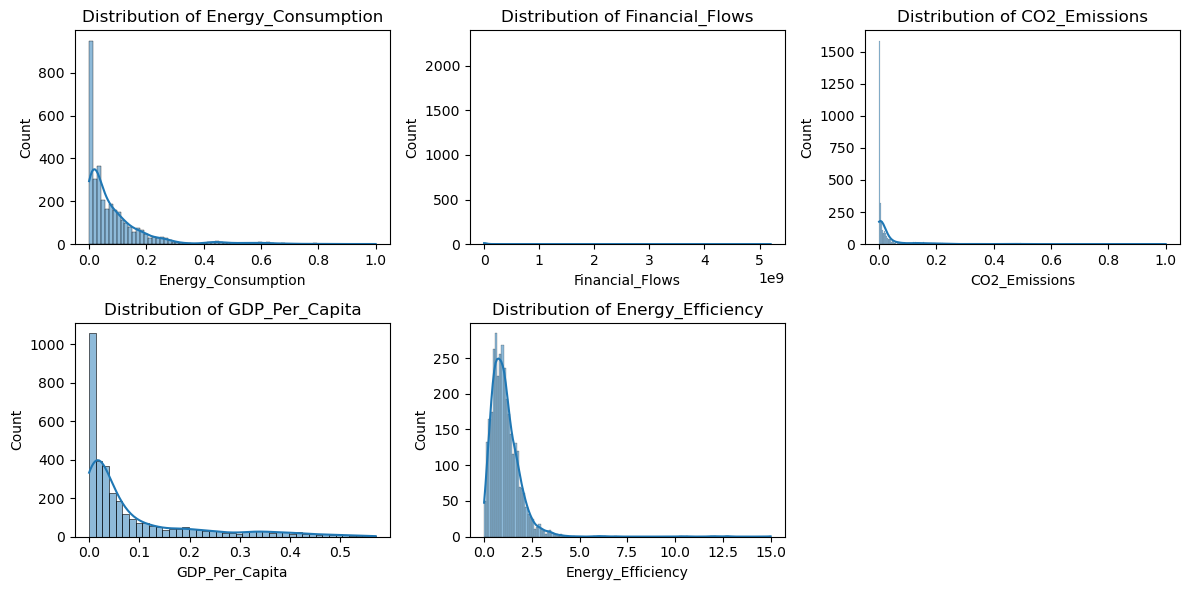

In [86]:

# Plot histograms of key numeric features
num_features = ["Energy_Consumption", "Financial_Flows", "CO2_Emissions", "GDP_Per_Capita", "Energy_Efficiency"]

plt.figure(figsize=(12, 6))
for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

In [88]:
df[num_features].describe()  # Check mean, min, max, standard deviation

,Energy_Consumption,Financial_Flows,CO2_Emissions,GDP_Per_Capita,Energy_Efficiency
count,3363.000000,3.363000e+03,3363.000000,3363.000000,3363.000000
mean,0.089107,4.212583e+07,0.032138,0.087316,1.117999
std,0.123808,2.069441e+08,0.082526,0.119501,0.866115
min,0.000000,0.000000e+00,0.000000,0.000013,0.006015
25%,0.011121,0.000000e+00,0.000558,0.009401,0.592981
50%,0.044440,0.000000e+00,0.003399,0.034000,0.977274
75%,0.114584,2.880000e+06,0.022931,0.109750,1.448758
max,1.000000,5.202310e+09,1.000000,0.570076,14.993109


✔ Financial_Flows → Extremely large range (0 to $5.2 billion), scaling is critical to prevent dominance over smaller features.

✔ CO2_Emissions & Energy_Consumption → Wide spread with min = 0 and max = 1, likely needs standardization to balance effect.

✔ GDP_Per_Capita → Small values (0.000013 to 0.57), may not require standardization since numbers are naturally constrained.

✔ Energy_Efficiency → Large variation (0.006 to 14.99), scaling is beneficial to stabilize the impact in ML models.


1.  Apply Multiple Scaling Method

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Select numerical features
num_features = ["Energy_Consumption", "Financial_Flows", "CO2_Emissions", "GDP_Per_Capita", "Energy_Efficiency"]

# StandardScaler (Centering & Unit Variance)
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[num_features] = standard_scaler.fit_transform(df_standard[num_features])

# MinMaxScaler (Range Scaling 0-1)
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_features] = minmax_scaler.fit_transform(df_minmax[num_features])

# RobustScaler (Handles Outliers)
robust_scaler = RobustScaler()
df_robust = df.copy()
df_robust[num_features] = robust_scaler.fit_transform(df_robust[num_features])

2. Compare Effect

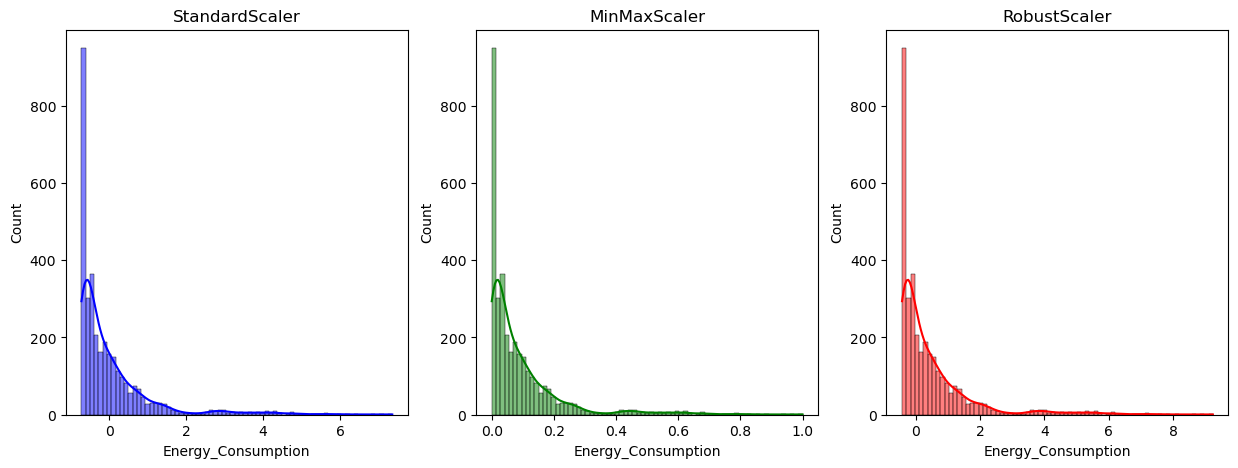

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Compare Energy_Consumption distributions
sns.histplot(df_standard["Energy_Consumption"], ax=axes[0], kde=True, color="blue").set_title("StandardScaler")
sns.histplot(df_minmax["Energy_Consumption"], ax=axes[1], kde=True, color="green").set_title("MinMaxScaler")
sns.histplot(df_robust["Energy_Consumption"], ax=axes[2], kde=True, color="red").set_title("RobustScaler")

plt.show()

3. Compare Scaled Values

In [96]:
scaled_comparison = df.copy()
scaled_comparison["StandardScaler_Energy_Consumption"] = df_standard["Energy_Consumption"]
scaled_comparison["MinMaxScaler_Energy_Consumption"] = df_minmax["Energy_Consumption"]
scaled_comparison["RobustScaler_Energy_Consumption"] = df_robust["Energy_Consumption"]

print(scaled_comparison[["Energy_Consumption",
                         "StandardScaler_Energy_Consumption",
                         "MinMaxScaler_Energy_Consumption",
                         "RobustScaler_Energy_Consumption"]].head())

   Energy_Consumption  StandardScaler_Energy_Consumption  \
0            0.001152                          -0.710521   
1            0.000902                          -0.712542   
2            0.000803                          -0.713343   
3            0.000876                          -0.712755   
4            0.000778                          -0.713547   

   MinMaxScaler_Energy_Consumption  RobustScaler_Energy_Consumption  
0                         0.001152                        -0.418391  
1                         0.000902                        -0.420809  
2                         0.000803                        -0.421767  
3                         0.000876                        -0.421064  
4                         0.000778                        -0.422011  


In [98]:
print(df[num_features].skew())  # High skew suggests MinMax or RobustScaler

Energy_Consumption     2.887258
Financial_Flows       12.291020
CO2_Emissions          5.704420
GDP_Per_Capita         1.844633
Energy_Efficiency      5.359484
dtype: float64


In [100]:
# Example with StandardScaler
X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- CO2_Intensity_Per_Capita
- Clean_Cooking_Fuels
- Electricity_Access
- Energy_Dependency
- Energy_Intensity
- ...


In [74]:
scaler = StandardScaler()
num_features = ["GDP_Per_Capita", "CO2_Emissions", "Energy_Consumption", "Renewables_Percentage"]
df[num_features] = scaler.fit_transform(df[num_features])

### Objective 3:  Split into testing and training datasets

In [76]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Econ_Energy_Cluster", "Energy_Cluster"])  
y = df["Energy_Cluster"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
datapath = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Energy/data'
energy_data_process = 'energy_data_process.csv'
filepath= os.path.join(datapath, energy_data_process)

df.to_csv(filepath, index= False)
print(f"Data saved successfully to '{filepath}'")

Data saved successfully to 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-3-Energy/data\energy_data_process.csv'
